<a href="https://colab.research.google.com/github/aamirtirmizi84/Homework3/blob/main/HW3MohammadaamirTirmizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/aamirtirmizi84/Homework3/main/faithful.csv')

In [19]:
df.tail()

,eruptions,waiting
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46
271,4.467,74


In [20]:
x = df['eruptions']
y = df['waiting']

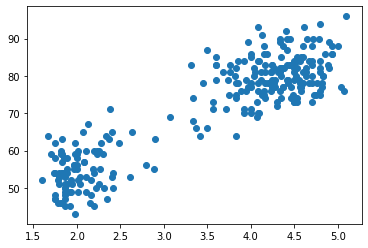

In [21]:
plt.scatter(x,y)
plt.show()
# here I see two clusters 

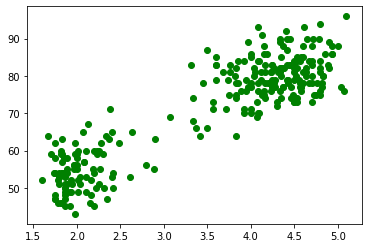

In [22]:
plt.scatter(x, y, c='green')
plt.show()

How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters

In the scatter plot, there are two clusters visible.

Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset?

In hierarchical clustering, each record is treated as a separate cluster, after which the distance between them is determined; when the distance is very little, they are treated as one cluster, and so on until the required number of clusters are obtained.

In [23]:
class KMeans:
    def __init__(self, k=2, x=0.001, iterations=300):
        self.k = k
        self.x = x
        self.iterations = iterations

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.iterations):
            self.cf = {}

            for i in range(self.k):
                self.cf[i] = []

            for f in data:
                distances = [np.linalg.norm(f-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.cf[classification].append(f)

            prev_centroids = dict(self.centroids)

            for classification in self.cf:
                self.centroids[classification] = np.average(self.cf[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.x:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


Reference : https://anderfernandez.com/en/blog/kmeans-algorithm-python/

In [24]:
df.values

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


In [26]:
colors = ["black", "green" , "blue", "red"]

def recalculate_clusters(X,centroids,k):
    clusters=dict()
    for i in range(k):
        clusters[i]=[]
    for data in X:
        e_distance=[]
        for j in range(k):
            e_distance.append(np.linalg.norm(data - centroids[j]))
        clusters[e_distance.index(min(e_distance))].append(data)
    return clusters    
 
def recalculate_centroids(centroids,clusters,k):
    for i in range(k):
        centroids[i]=np.average(clusters[i],axis=0)
    return centroids

def plot_clusters(centroids,clusters,k):
    plt.figure(figsize=(10,8))  
    area = (20)**2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0],cluster[1],c=colors[i % 3])          
        plt.scatter(centroids[i][0],centroids[i][1],s=area,marker='^', edgecolors='white',c=colors[i % 3])

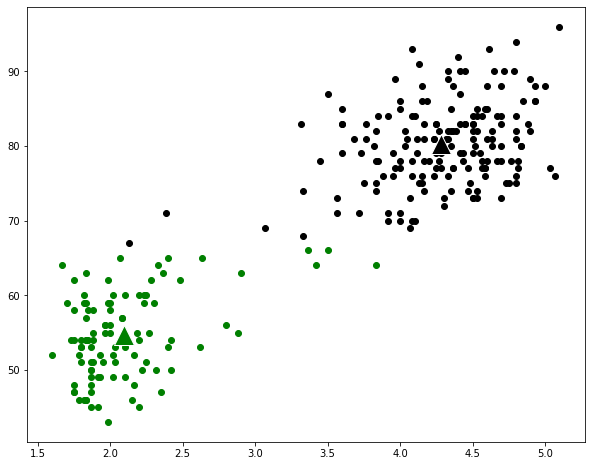

In [27]:
k=2
X = df.values
centroids={}
for i in range(k):
    centroids[i]=X[i]
    
for i in range(1):        
    clusters=recalculate_clusters(X,centroids,k)  
    centroids=recalculate_centroids(centroids,clusters,k)
    plot_clusters(centroids,clusters,k)

Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? 

Yes the method has been beneficial in finding clusters in problem 1.